**$\underline{SIR\hspace{0.2cm} Model\hspace{0.2cm} Applied\hspace{0.2cm} to\hspace{0.2cm} the\hspace{0.2cm} Black\hspace{0.2cm} Death}$**

The data was taken from this [research article](https://www.pnas.org/doi/full/10.1073/pnas.1715640115). The data are from ectoparasite model, for the city of Barcelona.

The difference of our code is that we used Euler's method (and RK!), in the article is used stochastic process.

**Parameters:**

$\beta_{low} =$ Transmission rate for bubonic plague from mildly infectious humans to body lice.

$\beta_{high} =$ Transmission rate for bubonic plague from highly infectious humans to body lice.

$\frac{1}{\sigma_b} = \sigma_b^{-1} =$ Average low infectious period for bubonic plague.

$g_h =$ Probability of recovery from bubonic plague.

$\frac{1}{\gamma_b} = \gamma_b^{-1} =$ Average high infectious period for bubonic plague.

$\gamma_I =$ Average infectious period for bubonic plague.

$\beta_l =$ Transmission rate for bubonic plague from body lice to humans.

$K_l =$ Lice index at carrying capacity. 

$r_l =$ Natural lice growth rate.

$I_{low} =$ Infectious with mild bacteremia (bacteria in the blood).

$I_{high} =$ Infectious with high bacteremia (bacteria in the blood).

$S_h =$ Susceptible.

$S_l =$ The susceptible that carry the lice.

$R_h =$ Recovered.

$D_h =$ Dead.

$N_h =$ Total living population.

$N_l =$ All the people that carrying the lice, susceptible or not.

**Equation:**

$\frac{dS_h}{dt} = -\beta_l\frac{S_h I_l}{N_h}$

$\frac{dI_{low}}{dt} = \beta_l\frac{S_h I_l}{N_h} - \sigma_b I_{low}$

$\frac{dI_{high}}{dt} = (1-g_h)\sigma_b I_{low} - \gamma_b I_{high}$

$\frac{dR_h}{dt} = g_h\sigma_b I_{low}$

$\frac{dD_h}{dt} = \gamma_b I_{high}$

$\frac{dS_l}{dt} = r_lS_l(1-N_l/K_l)-[(\beta_{low}I_{low}+\beta_{high}I_{high})S_l/N_h]$

$\frac{dI_l}{dt} = [(\beta_{low}I_{low}+\beta_{high}I_{high})S_l/N_h] - \gamma_I I_l$

$N_h = S_h + I_{low} + I_{high} + R_h$

**The equation using Euler's method of integration:**

$S(t + \Delta t) - S(t) = dS → S(t + \Delta t) = S(t) + dS$ 

and

$\frac{dS}{dt} = -\beta \frac{Sl}{N} →dS = -\beta\frac{Sl}{N}dt$

The equation in the code becomes: $S(t + \Delta t) = S(t) - \beta\frac{S(t)l}{N}\Delta t$. So


$S_h(t + \Delta t) = S_h(t) - \beta_l\frac{S_h(t)I_l}{N_h}\Delta t$

$I_{low}(t + \Delta t) = I_{low}(t) + (\beta\frac{S_h(t)I_l}{N} - \sigma_bI_{low})\Delta t$ 

$I_{high}(t + \Delta t) = I_{high}(t) + ((1-g_h)\sigma_b I_{low} - \gamma_b I_{high})\Delta t$

$R_h(t + \Delta t) = R_h(t) + (g_h\sigma_b I_{low})\Delta t$

$D_h(t + \Delta t) = D_h(t) + (\gamma_b I_{high})\Delta t$

$S_l(t + \Delta t) = S_l(t) + (r_lS_l(1-N_l/K_l)-[(\beta_{low}I_{low}+ \beta_{high}I_{high})S_l/N_h])\Delta t$


$I_l(t + \Delta t) = I_l(t) + ([(\beta_{low}I_{low}+\beta_{high}I_{high})S_l/N_h] - \gamma_I I_l)\Delta t$



$N_h = S_h + I_{low} + I_{high} + R_h$

$i = I_{low} + I_{high}$



**The code**

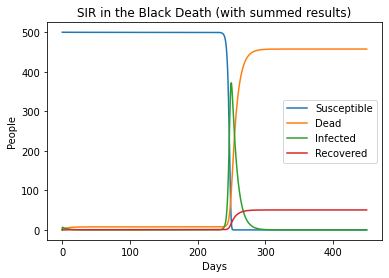

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conditions (constants):
b_low = (0.001 + 0.05)/2# U(0.001,0.05) Doing the averaging = 0.001 + 0.05/2 (because its not stochastic our method).
b_high = (0.001 + 1)/2 # U(0.001,1).
b_l = 0.05
sig_b = 1/8 # Days.
y_b = 1/2 # Days. yb⁻1 = 2, yb = 1/2. 
y_i = 1/3 
g_h = 0.1 # Seems to be dimensionless.
k_l = 15.0 # Per person.
r_l = 0.11 # Per day.

# Initial values (not constants):
N_l = 10 # Chosen value, because there is no value in the article.
N_h = 1000
s_h = 0.5005 * N_h
s_l = 10
i_l = 1
i_low = 5
i_high = 2
d = 1
R = 0
i = 0 
dt,t,days = 0.1,0, 450

# Lists:
list_S,list_t,list_R,list_Ilow,list_D,list_I = [s_h],[t],[R],[i_low],[d],[i]
list_Ihigh = [i_high]

while t < days:
  a = s_h # Auxiliary variable, using on parameters that are not constant.
  s_h = s_h - b_l * ((s_h * i_l)/N_h) * dt
  list_S.append(s_h)

  c = i_low
  i_low = i_low + (((b_l * a * i_l)/N_h) - sig_b * i_low) * dt
  list_Ilow.append(i_low)
  
  e = i_high
  i_high = i_high + (((1 - g_h) * sig_b * c) - (y_b * i_high)) * dt
  list_Ihigh.append(i_high)
  
  i = i_high + i_low
  list_I.append(i)

  f = R
  R = R + (g_h * sig_b * c) * dt
  list_R.append(R)

  g = d
  d = d + (y_b * e) * dt 
  list_D.append(d) # d - g = deaths per day/time "step".

  h = s_l
  s_l = s_l + (((1 - N_l/k_l) * r_l * s_l) - ((b_low * c + b_high * e) * (s_l/N_h))) * dt
  
  j = i_l
  i_l = i_l + (((b_low * c + b_high * e) * (h/N_h)) - y_i * i_l) * dt
  
  N_h = a + c + e + f

  t = t + dt
  list_t.append(t)

plt.plot(list_t,list_S)
plt.plot(list_t,list_D)
plt.plot(list_t,list_I)
plt.plot(list_t,list_R)
plt.title('SIR in the Black Death (with summed results)')
plt.legend(['Susceptible','Dead','Infected','Recovered'])
plt.ylabel('People')
plt.xlabel('Days')
plt.show()

Using Runge-Kutta $2^{nd}$ order (RK 2) model, just to be sure that the Euler method is correct (this method is not always correct, the error can be seen in elastic code here in my GitHub).

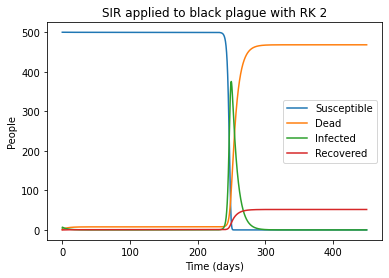

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as scipy

'''                   To check if Euler can be applied, was chosen to use RK2 to verify if the results are the same                    '''
# Conditions (constants):
b_low = (0.001 + 0.05)/2# U(0.001,0.05) Doing the averaging = 0.001 + 0.05/2 (because its not stochastic our method).
b_high = (0.001 + 1)/2 # U(0.001,1).
b_l = 0.05
sig_b = 1/8 # Days.
y_b = 1/2 # Days. yb⁻1 = 2, yb = 1/2.
y_i = 1/3
g_h = 0.1 # Seems to be dimensionless.
k_l = 15.0 # Per person.
r_l = 0.11 # Per day.

# Initial values (not constants):
N_l = 10 # Chosen value, because there is no value in the article.
N_h = 1000
s_h = 0.5005 * N_h
s_l = 10
i_l = 1
i_low = 5
i_high = 2
d = 1
R = 0
i = 0
dt,t,days = 0.1,0,450

# Lists:
list_S,list_t,list_R,list_I,list_D = [s_h],[t],[R],[i_low],[d]
list_Sl,list_Ilow = [s_l],[i_l]

while t < days:
  a = s_h # Auxiliary variable, using on parameters that are not constant.
  s_h = s_h - b_l * ((s_h * i_l)/N_h) * dt/2
  s_h_2 = a - b_l * ((s_h * i_l)/N_h) * dt
  list_S.append(s_h_2)

  c = i_low
  i_low = i_low + (((b_l * a * i_l)/N_h) - sig_b * i_low) * dt/2
  i_low_2 = c + (((b_l * a * i_l)/N_h) - sig_b * i_low) * dt

  e = i_high
  i_high = i_high + (((1 - g_h) * sig_b * c) - (y_b * i_high)) * dt/2
  i_high_2 = e + (((1 - g_h) * sig_b * c) - (y_b * i_high)) * dt

  i = i_low + i_high
  list_I.append(i)

  f = R
  R = R + (g_h * sig_b * c) * dt/2
  R_2 = f + (g_h * sig_b * c) * dt
  list_R.append(R_2)

  g = d
  d = d + (y_b * e) * dt/2
  d_2 = g + (y_b * e) * dt
  list_D.append(d_2)

  h = s_l
  s_l = s_l + (((1 - (N_l/k_l)) * r_l * s_l) - ((b_low * c + b_high * e) * (s_l/N_h))) * dt/2
  s_l_2 = h + (((1 - (N_l/k_l)) * r_l * s_l) - ((b_low * c + b_high * e) * (s_l/N_h))) * dt
  #list_Sl.append(s_l2)
  
  j = i_l
  i_l = i_l + (((b_low * c + b_high * e) * (h/N_h)) - y_i * i_l) * dt/2
  i_l_2 = j + (((b_low * c + b_high * e) * (h/N_h)) - y_i * i_l) * dt
  #list_Ilow.append(i_l2)
  
  N_h = a + c + e + f

  s_h = s_h_2
  i_low = i_low_2
  i_high = i_high_2
  R = R_2
  d = d_2
  s_l = s_l_2
  i_l = i_l_2

  t = t + dt
  list_t.append(t)

plt.plot(list_t,list_S)
plt.plot(list_t,list_D)
plt.plot(list_t,list_I)
plt.plot(list_t,list_R)
plt.title('SIR applied to black plague with RK 2')
plt.ylabel('People')
plt.xlabel('Time (days)')
plt.legend(['Susceptible','Dead','Infected','Recovered'])
plt.show()

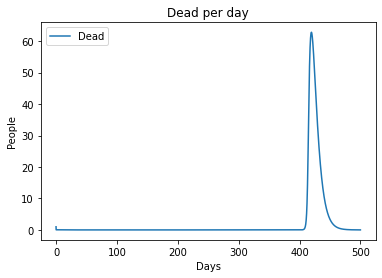

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Conditions (constants):
b_low = (0.001 + 0.05)/2# U(0.001,0.05) Doing the averaging = 0.001 + 0.05/2 (because its not stochastic our method).
b_high = (0.001 + 1)/2 # U(0.001,1).
b_l = 0.05
sig_b = 1/8 # days.
y_b = 0.2 # days. yb⁻1 = 2, yb = 1/2.
y_i = 1/3 
g_h = 0.1 # Seems to be dimensionless.
k_l = 15.0 # Per person.
r_l = 0.11 # Per day.

# Initial values (not constants):
N_l = 10 # Chosen value, because there is no value in the article.
N_h = 25000
s_h = 0.5005 * N_h
s_l = 1
i_l = 1
i_low = 5
i_high = 2
d = 1
R = 0
i = 0
dt,t,days = 0.1,0, 500

# Lists:
list_S,list_t,list_R,list_ilow,list_D,list_I = [s_h],[t],[R],[i_low],[d],[i]
list_ihigh = [i_high]

while t < days:
  a = s_h # Auxiliary variable, using on parameters that are not constant.
  s_h = s_h - b_l * ((s_h * i_l)/N_h) * dt
  list_S.append(s_h)

  c = i_low
  i_low = i_low + (((b_l * a * i_l)/N_h) - sig_b * i_low) * dt
  list_ilow.append(i_low)
  
  e = i_high
  i_high = i_high + (((1 - g_h) * sig_b * c) - (y_b * i_high)) * dt
  list_ihigh.append(i_high)
  
  i = i_high + i_low
  list_I.append(i)

  f = R
  R = R + (g_h * sig_b * c) * dt
  list_R.append(R)

  g = d
  d = (y_b * e) * dt 
  list_D.append(d) # d - g = deaths per day/time "step".

  h = s_l
  s_l = s_l + (((1 - N_l/k_l) * r_l * s_l) - ((b_low * c + b_high * e) * (s_l/N_h))) * dt
  
  j = i_l
  i_l = i_l + (((b_low * c + b_high * e) * (h/N_h)) - y_i * i_l) * dt
  
  N_h = a + c + e + f

  t = t + dt
  list_t.append(t)

plt.plot(list_t,list_D)
plt.legend(['Dead'])
plt.ylabel('People')
plt.xlabel('Days')
plt.title('Dead per day')
plt.show()